# Temperature Reader

Import required libraries (some just for visualising the process).

In [1]:
import sys

sys.path.append('..')
from tempocr import imageprocess
from os import path

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from PIL import Image
from tempocr import screen
import numpy as np
import tempfile

## Process Original Image
* Scale image down for faster processing
* Find corners by searching for the stickers (colour must be provided)

In [2]:
#image_file = '../test_images/auto_2018-01-29_141232.jpg'
image_file = '../test_images/2018-02-09-1349.png'

#image_file = 'test_images/auto_2018-02-06_135534.jpg'
#image_file = 'test_images/20180206_153314_scaled_down.jpg'
#image_file = 'tests/fixtures/markers_with_box.gif'
output_file = '{}/{}_fixed.png'.format(path.dirname(image_file), path.splitext(path.basename(image_file))[0]);

Show some information on the original image.

Fix Perspective
---------------
Input file: ../test_images/2018-02-09-1349.png 
Output file: ../test_images/2018-02-09-1349_fixed.png



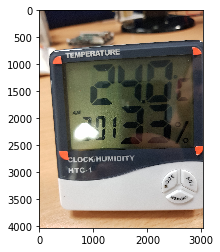

In [3]:
print('Fix Perspective')
print('---------------')
print('Input file: {} \nOutput file: {}'.format(image_file, output_file))
print('')

img = mpimg.imread(image_file)
plt.imshow(img)

Show how the scaled down image will look.

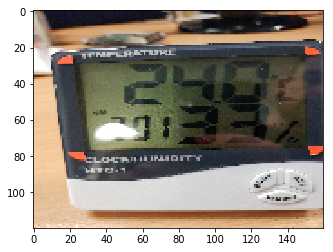

In [4]:
im = Image.open(image_file)
im = im.resize((160, 120), resample=Image.NEAREST)
width, height = im.size

#img = mpimg.imread()
implt = plt.imshow(np.asarray(im))

Find the screen and plot the points as an outline for visualising what is being detected.

In [5]:
#MARKER_COLOR = (255, 147, 121)
MARKER_COLOR = (255, 120, 80)

found_screen = screen.find_screen(im, MARKER_COLOR)

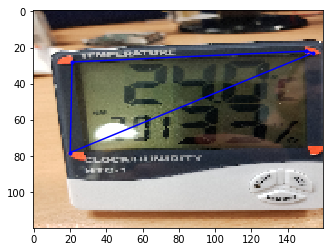

In [6]:
temp_file = tempfile.NamedTemporaryFile()
im.save(temp_file.name, 'PNG')

im2 = plt.imread(temp_file.name)
implot = plt.imshow(im2)

#plt.xlim([0,160])
#plt.ylim([120,0])

#plt.plot(found_screen.markerTL.point_br[0], found_screen.markerTL.point_br[1], 'bo')
#plt.plot(found_screen.markerTR.point_tl[0], found_screen.markerTR.point_br[1], 'bo')
#plt.plot(found_screen.markerBL.point_br[0], found_screen.markerBL.point_tl[1], 'bo')
#plt.plot(found_screen.markerBR.point_tl[0], found_screen.markerBR.point_tl[1], 'bo')

xp = [
    found_screen.markerTL.point_br[0],
    found_screen.markerTR.point_tl[0],
    found_screen.markerBR.point_tl[0],
    found_screen.markerBL.point_br[0],
    found_screen.markerTL.point_br[0]
]

yp = [
    found_screen.markerTL.point_br[1],
    found_screen.markerTR.point_br[1],
    found_screen.markerBR.point_tl[1],
    found_screen.markerBL.point_tl[1],
    found_screen.markerTL.point_br[1]
]

plt.plot(xp, yp, '.b-')

plt.show()

Run the actual process (same as above except we now pass the coordinates to ImageMagick to distort the image ready for character reading).

In [7]:
tmp = imageprocess.prepare_for_ocr(image_file, MARKER_COLOR)

In [8]:
from shutil import copyfile
copyfile(tmp.name, output_file)
#new_image_file = open(output_file, 'w')
#new_image_file.write(tmp.read())
#tmp.close()
#new_image_file.close()

'../test_images/2018-02-09-1349_fixed.png'

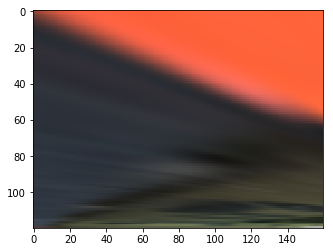

In [9]:
img2 = mpimg.imread(tmp)
plt.imshow(img2)

## Read Temperature
Attempt to read the temperature from the processed image.

In [10]:
from tempocr.digit_recognition import read_temperature
temp_img = Image.open(tmp)

### Colour Picking
The following just shows where colors are picked from to determine on/off colours.

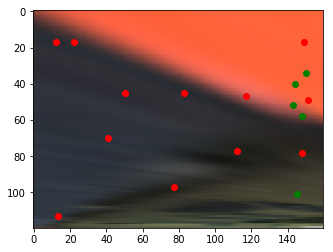

In [11]:
from tempocr.digit_recognition import bg_color_coords, fg_color_coords

plt.imshow(temp_img)

xpts = []
ypts = []

for coords in bg_color_coords:
    xpts.append(coords.get_pixel_x(temp_img))
    ypts.append(coords.get_pixel_y(temp_img))

plt.plot(xpts, ypts, 'ro')

xpts = []
ypts = []

for coords in fg_color_coords:
    xpts.append(coords.get_pixel_x(temp_img))
    ypts.append(coords.get_pixel_y(temp_img))
    
plt.plot(xpts, ypts, 'go')

In [12]:
from tempocr.digit_recognition import get_bg_colors, get_fg_colors
from tempocr.digit_recognition import get_digits

bg_colors = get_bg_colors(temp_img)
fg_colors = get_fg_colors(temp_img)

digits = get_digits(temp_img)

cnt = 0
for stripe in digits[0].segment_stripes:
    print('{} is: {}'.format(cnt, 'on' if stripe.is_on(bg_colors, fg_colors) else 'off'))
    cnt += 1

0 is: on
1 is: on
2 is: off
3 is: off
4 is: off
5 is: off
6 is: off


The following is just to show where the segment stripes are plotted when reading the temperature.

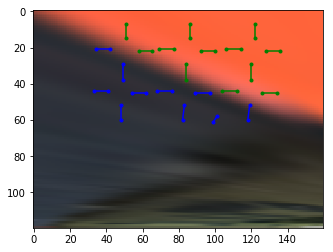

In [13]:
plt.imshow(temp_img)

for digit in digits:
    #print(digit)
    for stripe in digit.segment_stripes:
        #print(stripe)
        line_color = 'g' if stripe.is_on(bg_colors, fg_colors) else 'b'
        xpts = [
            stripe.start[0], stripe.end[0]
        ]
        ypts = [
            stripe.start[1], stripe.end[1]
        ]
        plt.plot(xpts, ypts, '.{}-'.format(line_color))
    #digit.draw_on_image()
    
plt.show()

In [14]:
temperature = read_temperature(temp_img)

print('Temperature: {}'.format(temperature))

Temperature: 
